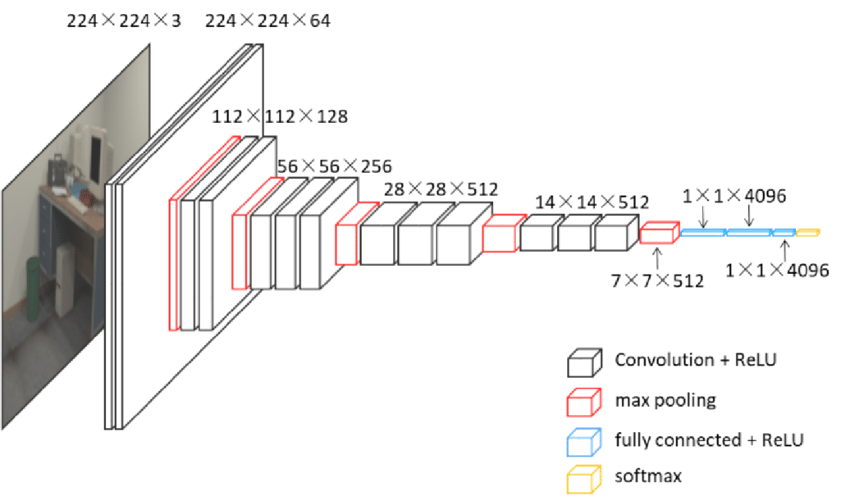

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [5]:
class VGG16(nn.Module):
    def __init__(self, num_classes=1000):
        super(VGG16, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding="same"),
            nn.ReLU(),
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding="same"),
            nn.ReLU(),  
            nn.MaxPool2d(kernel_size=2, stride=2)        
        )

        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding="same"),
            nn.ReLU()  
        )

        self.layer4 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding="same"),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)          
        )

        self.layer5 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding="same"),
            nn.ReLU()  
        )

        self.layer6 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding="same"),
            nn.ReLU()          
        )

        self.layer7 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding="same"),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)                      
        )

        self.layer8 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding="same"),
            nn.ReLU()  
        )

        self.layer9 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding="same"),
            nn.ReLU()          
        )

        self.layer10 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding="same"),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)                      
        )

        self.layer11 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding="same"),
            nn.ReLU()  
        )

        self.layer12 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding="same"),
            nn.ReLU()          
        )

        self.layer13 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding="same"),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)          
        )

        self.layer14 = nn.Sequential(
            nn.Linear(7*7*521, 4096),
            nn.ReLU()
        )

        self.layer15 = nn.Sequential(
            nn.Linear(4096, 4096),
            nn.ReLU()
        )

        self.layer16 = nn.Sequential(
            nn.Linear(4096, 4096),
            nn.ReLU()
        )

    def forward(self, x):
      x = self.layer1(x)
      x = self.layer2(x)
      x = self.layer3(x)
      x = self.layer4(x)
      x = self.layer5(x)
      x = self.layer6(x)
      x = self.layer7(x)
      x = self.layer8(x)
      x = self.layer9(x)
      x = self.layer10(x)
      x = self.layer11(x)
      x = self.layer12(x)
      x = self.layer13(x)
      x = x.view(x.size(0), -1)
      x = self.layer14(x)
      x = self.layer15(x)
      x = self.layer16(x)
      logits = self.classifier(x)
      probas = F.softmax(logits, dim=1)
      return probas
